In [1]:
# Importaing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
dataset = pd.read_csv("../input/Admission_Predict.csv")

In [3]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Removing column 'Serial No.' from dataframe
dataset.drop('Serial No.', axis = 1 , inplace = True)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [6]:
dataset.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
# This is another method which we can use to check for null values.

round(( dataset.isnull().sum() / len(dataset.index) )*100 , 2)

GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

In [8]:
# Creating a derived column

avg_score = round(((dataset.loc[:,['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']].sum(axis = 1))/(340+120+5+5+10))*100, 2)
dataset.insert(7, 'Average_score', avg_score)


In [9]:
dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Average_score,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,98.68,0.92
1,324,107,4,4.0,4.5,8.87,1,93.41,0.76
2,316,104,3,3.0,3.5,8.00,1,90.52,0.72
3,322,110,3,3.5,2.5,8.67,1,93.06,0.80
4,314,103,2,2.0,3.0,8.21,0,89.63,0.65


In [10]:
corr_matrix = dataset.corr()
round( corr_matrix , 3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Average_score,Chance of Admit
GRE Score,1.000,0.836,0.669,0.613,0.558,0.833,0.580,0.975,0.803
TOEFL Score,0.836,1.000,0.696,0.658,0.568,0.828,0.490,0.930,0.792
University Rating,0.669,0.696,1.000,0.735,0.660,0.746,0.448,0.734,0.711
SOP,0.613,0.658,0.735,1.000,0.730,0.718,0.444,0.704,0.676
LOR,0.558,0.568,0.660,0.730,1.000,0.670,0.397,0.637,0.670
CGPA,0.833,0.828,0.746,0.718,0.670,1.000,0.522,0.886,0.873
Research,0.580,0.490,0.448,0.444,0.397,0.522,1.000,0.577,0.553
Average_score,0.975,0.930,0.734,0.704,0.637,0.886,0.577,1.000,0.849
Chance of Admit,0.803,0.792,0.711,0.676,0.670,0.873,0.553,0.849,1.000


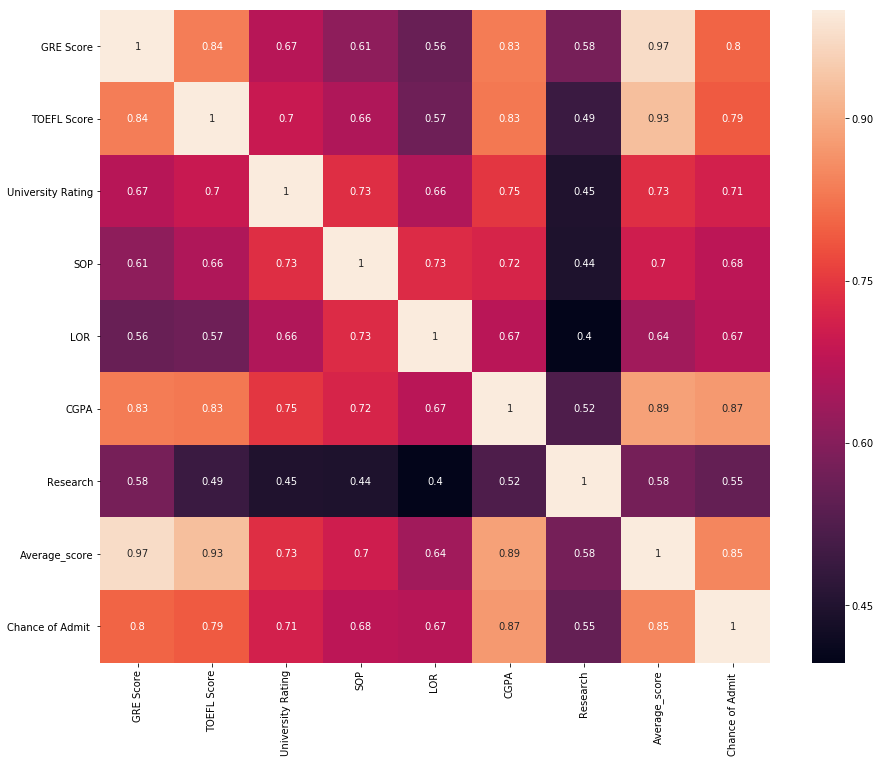

In [11]:
plt.figure(figsize = (15,12))
sns.heatmap(corr_matrix , annot = True)
plt.show()

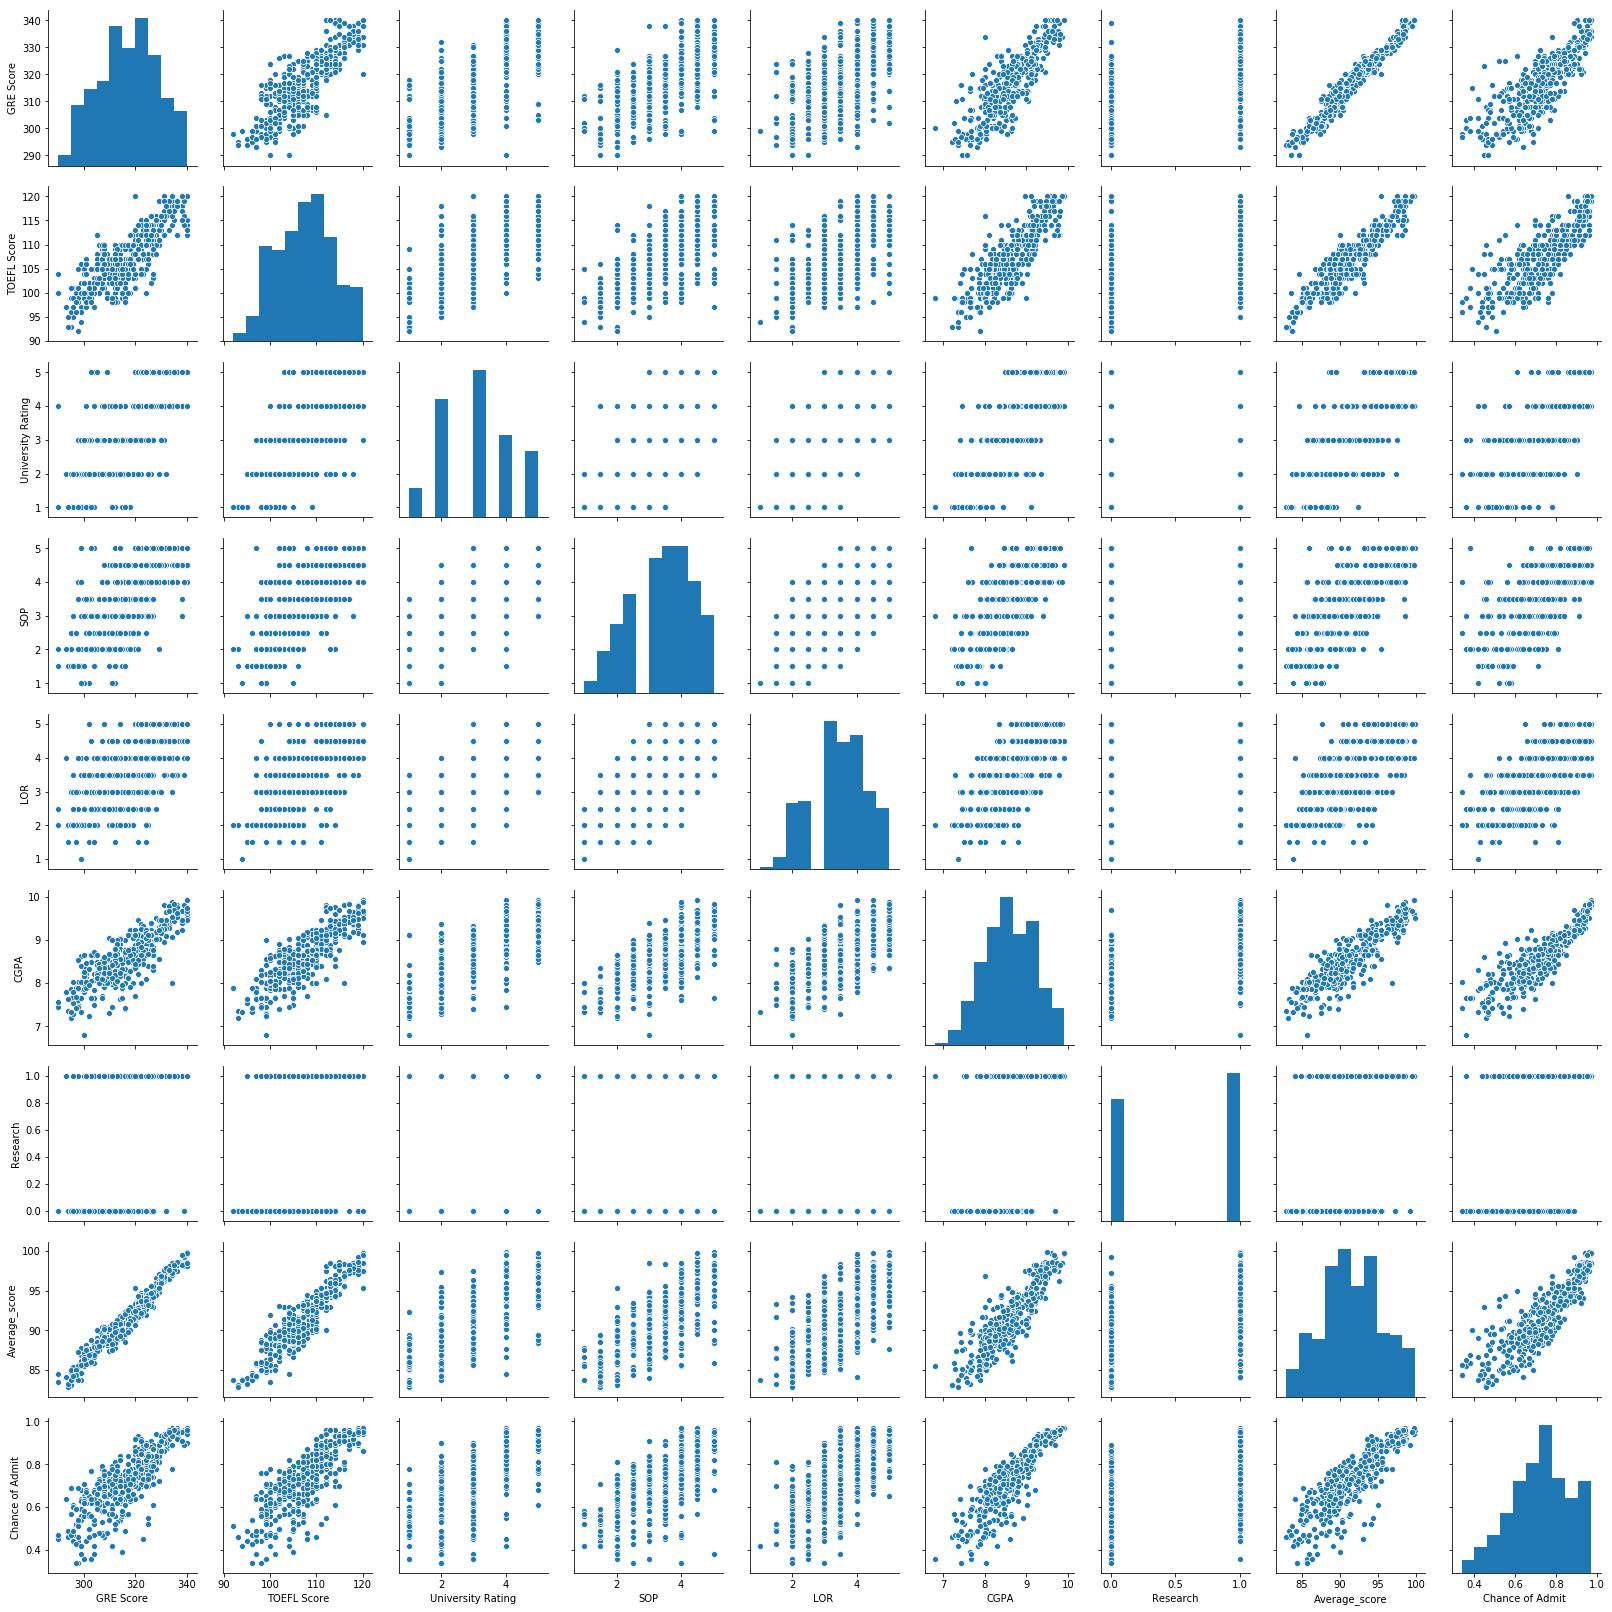

In [12]:
sns.pairplot(dataset)
plt.show()

* From the above correlation matrix , heat map and pair plot, it is clear that 'Chance of Admit' is somewhat correlated with every other independent variable.
* Strong correlation exists between 'Chance of Admit' and 'GRE Score' , 'TOEFL Score' , 'CGPA' and 'Average_score'

In [13]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))

def inv_normalize (y , x):
    return ( (y*( max(x) - min(x) )) + np.mean(x))

scaled_df = dataset.apply(normalize)

# to inverse normalizaion
#for column in dataset.columns:
#    scaled_df[column] = inv_normalize(scaled_df[column] , dataset[column])
#    scaled_df[column] = scaled_df[column].astype(type(dataset[column][0]))

In [14]:
scaled_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Average_score,Chance of Admit
0,0.40385,0.378214,0.228125,0.275,0.261875,0.336883,0.4525,0.416358,0.310556
1,0.14385,-0.014643,0.228125,0.150,0.261875,0.086883,0.4525,0.106540,0.056587
2,-0.01615,-0.121786,-0.021875,-0.100,0.011875,-0.191963,0.4525,-0.063360,-0.006905
3,0.10385,0.092500,-0.021875,0.025,-0.238125,0.022780,0.4525,0.085964,0.120079
4,-0.05615,-0.157500,-0.271875,-0.350,-0.113125,-0.124655,-0.5475,-0.115682,-0.118016


# Constructing 1st model

In [15]:
# Dividing data in X and Y
X = scaled_df.iloc[:,[0,1,2,3,4,5,6,7]]
y = scaled_df.iloc[:,8]

# dividing the data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [16]:
# creating regression model
X_trainsm = sm.add_constant(X_train)
lm1 = sm.OLS(y_train, X_trainsm).fit()

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     163.2
Date:                Wed, 10 Apr 2019   Prob (F-statistic):          1.63e-106
Time:                        06:39:33   Log-Likelihood:                 279.54
No. Observations:                 320   AIC:                            -541.1
Df Residuals:                     311   BIC:                            -507.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0032      0.00

In [17]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(by = 'VIF', axis=0, ascending=False, inplace=True)

vif

,VIF,features
7,1.788157e+06,Average_score
0,6.780002e+05,GRE Score
1,1.896422e+05,TOEFL Score
3,5.236751e+03,SOP
4,4.149303e+03,LOR
5,1.832618e+03,CGPA
2,2.920228e+00,University Rating
6,1.543339e+00,Research


# Constructing 2nd model

In [18]:
# Removed Average_score
X = scaled_df.iloc[:,[0,1,2,3,4,5,6]]
y = scaled_df.iloc[:,8]

# dividing the data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [19]:
# creating regression model
X_trainsm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_trainsm).fit()

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     186.7
Date:                Wed, 10 Apr 2019   Prob (F-statistic):          1.56e-107
Time:                        06:39:33   Log-Likelihood:                 279.23
No. Observations:                 320   AIC:                            -542.5
Df Residuals:                     312   BIC:                            -512.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0033      0.00

In [20]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(by = 'VIF', axis=0, ascending=False, inplace=True)

vif

,VIF,features
5,5.207403,CGPA
0,4.615516,GRE Score
1,4.288959,TOEFL Score
3,3.075504,SOP
2,2.919606,University Rating
4,2.431258,LOR
6,1.543312,Research


# Constructing 3rd model

In [21]:
# Removed CGPA
X = scaled_df.iloc[:,[0,1,2,3,4,6]]
y = scaled_df.iloc[:,8]

# dividing the data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [22]:
# creating regression model
X_trainsm = sm.add_constant(X_train)
lm3 = sm.OLS(y_train, X_trainsm).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     160.8
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           1.74e-92
Time:                        06:39:33   Log-Likelihood:                 240.87
No. Observations:                 320   AIC:                            -467.7
Df Residuals:                     313   BIC:                            -441.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0019      0.00

In [23]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(by = 'VIF', axis=0, ascending=False, inplace=True)

vif

,VIF,features
0,3.946349,GRE Score
1,3.889980,TOEFL Score
3,3.013285,SOP
2,2.822063,University Rating
4,2.332471,LOR
5,1.542359,Research


# Constructing 4th model

In [24]:
# Removed SOP
X = scaled_df.iloc[:,[0,1,2,4,6]]
y = scaled_df.iloc[:,8]

# dividing the data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [25]:
# creating regression model
X_trainsm = sm.add_constant(X_train)
lm4 = sm.OLS(y_train, X_trainsm).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     193.6
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           1.20e-93
Time:                        06:39:33   Log-Likelihood:                 240.86
No. Observations:                 320   AIC:                            -469.7
Df Residuals:                     314   BIC:                            -447.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0019      0.00

In [26]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(by = 'VIF', axis=0, ascending=False, inplace=True)

vif

,VIF,features
0,3.943991,GRE Score
1,3.766381,TOEFL Score
2,2.496949,University Rating
3,1.874464,LOR
4,1.531780,Research


# Constructing 5th model

In [27]:
# Removed GRE
X = scaled_df.iloc[:,[1,2,4,6]]
y = scaled_df.iloc[:,8]

# dividing the data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [28]:
# creating regression model
X_trainsm = sm.add_constant(X_train)
lm5 = sm.OLS(y_train, X_trainsm).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     210.7
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           1.04e-87
Time:                        06:39:33   Log-Likelihood:                 224.08
No. Observations:                 320   AIC:                            -438.2
Df Residuals:                     315   BIC:                            -419.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0027      0.00

In [29]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(by = 'VIF', axis=0, ascending=False, inplace=True)

vif

,VIF,features
1,2.454621,University Rating
0,2.160035,TOEFL Score
2,1.866015,LOR
3,1.369238,Research


# Constructing 6th model

In [30]:
# Removed University Rating
X = scaled_df.iloc[:,[1,4,6]]
y = scaled_df.iloc[:,8]

# dividing the data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [31]:
# creating regression model
X_trainsm = sm.add_constant(X_train)
lm6 = sm.OLS(y_train, X_trainsm).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     272.6
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           2.66e-87
Time:                        06:39:33   Log-Likelihood:                 220.18
No. Observations:                 320   AIC:                            -432.4
Df Residuals:                     316   BIC:                            -417.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0026      0.007     -0.377      

In [32]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(by = 'VIF', axis=0, ascending=False, inplace=True)

vif

,VIF,features
0,1.681742,TOEFL Score
1,1.517135,LOR
2,1.352761,Research


# Constructing 7th model

In [33]:
# As TOEFL is highly correlated with GRE, CGPA and Average_value , tried with different combinations and chose CGPA

X = scaled_df.iloc[:,[4,5,6]]
y = scaled_df.iloc[:,8]

# dividing the data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [34]:
# creating regression model
X_trainsm = sm.add_constant(X_train)
lm7 = sm.OLS(y_train, X_trainsm).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     402.6
Date:                Wed, 10 Apr 2019   Prob (F-statistic):          1.40e-107
Time:                        06:39:33   Log-Likelihood:                 267.51
No. Observations:                 320   AIC:                            -527.0
Df Residuals:                     316   BIC:                            -512.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0039      0.006     -0.662      0.5

In [35]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(by = 'VIF', axis=0, ascending=False, inplace=True)

vif

,VIF,features
1,2.113150,CGPA
0,1.825648,LOR
2,1.381549,Research


# Predicting using 7th model

In [36]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

# Note lm7 directly could have been used for which the below code will be required
#X_testsm = sm.add_constant(X_test)
#y_pred = lm7.predict(X_testsm)

# Model Evaluation

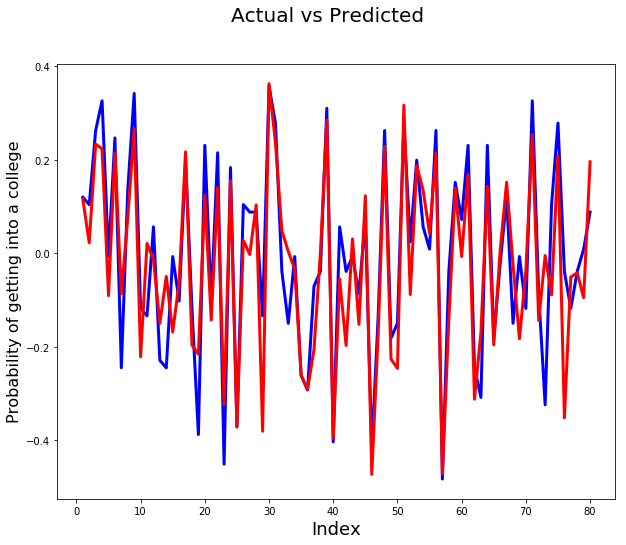

In [37]:
# Actual vs Predicted

c = [i for i in range(1,81,1)]
plt.figure(figsize = (10,8))
plt.plot(c,y_test, color = 'blue', linewidth = 3 , linestyle = '-')
plt.plot(c,y_pred, color = 'red', linewidth = 3 , linestyle = '-')
plt.suptitle("Actual vs Predicted", fontsize = 20)
plt.xlabel("Index", fontsize = 18)
plt.ylabel('Probability of getting into a college', fontsize = 16)
plt.show()

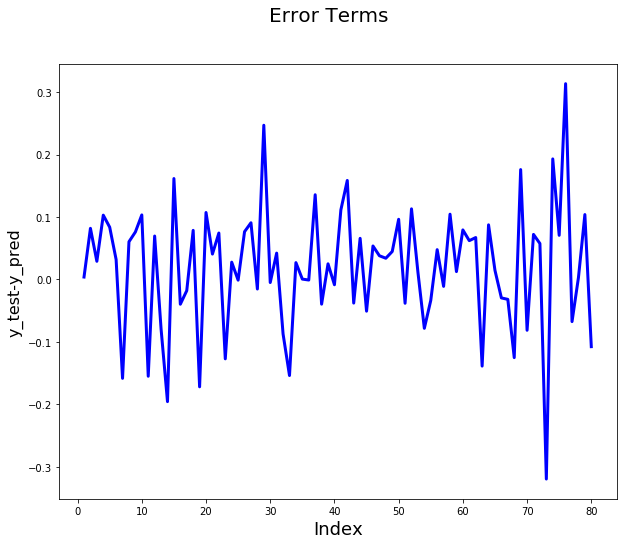

In [38]:
# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure(figsize = (10,8))
plt.plot(c,y_test-y_pred, color="blue", linewidth=3, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('y_test-y_pred', fontsize=16)
plt.show()

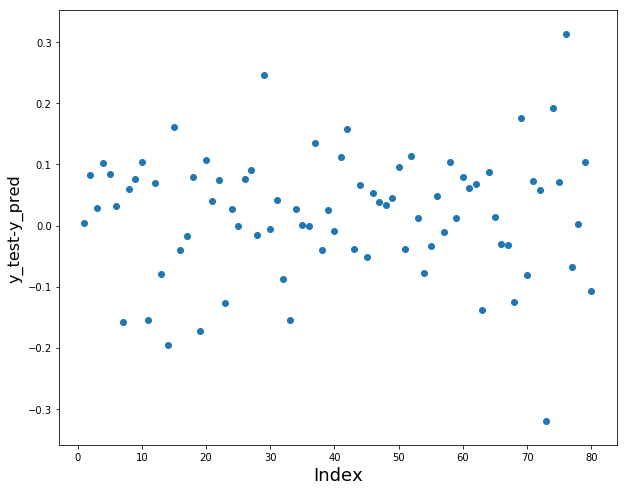

In [39]:
# Error terms scatter plot
c = [i for i in range(1,81,1)]
plt.figure(figsize = (10,8))
plt.scatter(c, y_test-y_pred)
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('y_test-y_pred', fontsize=16) 
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


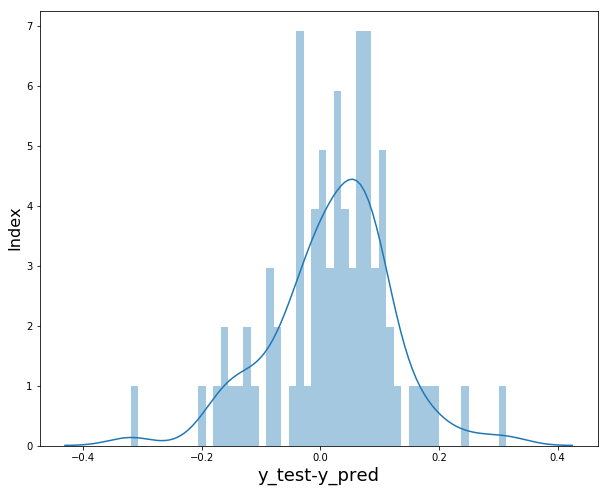

In [40]:
# Plotting the error terms to understand the distribution.
plt.figure(figsize = (10,8))
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

In [41]:
print("r2 value of train data : " + str(lm.score(X_train,y_train)))
print("r2 value of test data : " + str(lm.score(X_test,y_test)))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))

r2 value of train data : 0.7926369596376975
r2 value of test data : 0.7554692678739483
RMSE : 0.10289990180046145


In [42]:
lm.coef_
coeff_df = pd.DataFrame(lm.coef_, X_test.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
LOR,0.149243
CGPA,0.858048
Research,0.055509


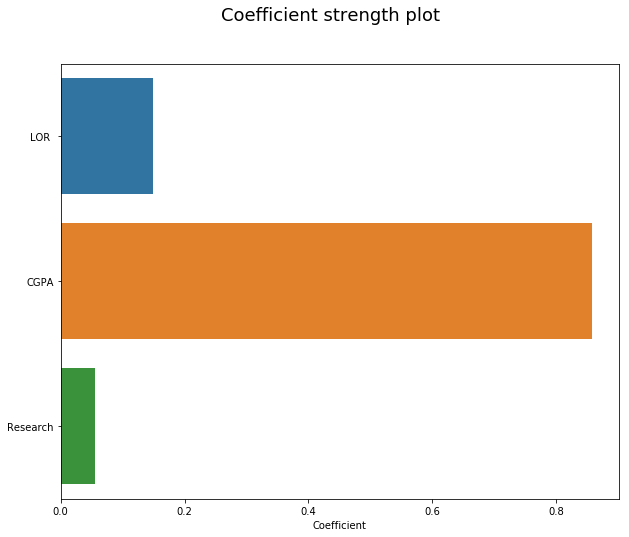

In [43]:
# Visualizeing coefficients
plt.figure(figsize = (10,8))
sns.barplot(x = 'Coefficient', y = coeff_df.index, data = coeff_df)
plt.suptitle('Coefficient strength plot', fontsize = 18)
plt.show()

# Here we find that although 3 independent variables are included , CGPA has the highest coefficient. Therefore CGPA playes an important factor in deciding the chances of admission

# Independent variables were selected based on p-value and VIF(Variance Inflation Factor).
# For p-value alpha = 005. p-value greater than 0.05 signifies the independent variable was insignificant.
# For VIF , if the vif value was <=2 or very close to 2, the independent variable was selected. Higher VIF for a particular independent variable means that the independent variable can be predicted with other independent variables, thus multicollinier .